# 6.5 Economic Freedom Data: Clustering

## This Script Contains the Following points

### 1. Importing Libraries
### 2. Importing  and Checking Data sets
### 3. Wrangle data to correct format
### 4. Create elbow curve
### 5. K-means clustering 
### 6. Plots to explore the data in light of the clusters
### 7. Descriptive Stats for each cluster


### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

### 2. Importing and Checking Data sets

In [3]:
#Define path
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach6_Dashboard/Economic_Freedom_Analysis/'

In [4]:
#Import Data
df_Recent = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Subset_Recent_Year_Data.pkl'))

In [5]:
#Check Data
df_Recent.head()

,Country,Economic Freedom Summary Index,Rank,Quartile,GDP_PerCapita,GDP_2010Prices_Millions,Pop_mill,Pop_male_mill,Pop_female_mill,Pop_0_14_per,...,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male,Continent,Income group,Landlocked?,LDC?,English?
0,Albania,7.60,31.0,1.0,5181.0,12541.0,2.84,1.42,1.42,16.1,...,100.4,76.5,79.2,56.8,62.1,Europe,Upper middle income,0,0,0
1,Algeria,4.82,157.0,4.0,3368.0,168331.0,44.90,22.86,22.04,30.6,...,111.7,82.7,75.5,62.4,42.3,Africa,Lower middle income,0,0,0
2,Angola,5.38,149.0,4.0,1896.0,105625.0,35.59,17.59,18.00,45.0,...,NaN,NaN,NaN,NaN,NaN,Africa,Lower middle income,0,1,0
3,Argentina,4.77,158.0,4.0,8476.0,558065.0,45.51,22.53,22.98,23.1,...,115.8,96.8,88.8,75.6,65.2,South America,Upper middle income,0,0,1
4,Armenia,7.58,33.0,1.0,4266.0,11919.0,2.78,1.25,1.53,20.5,...,94.6,NaN,NaN,NaN,NaN,Asia,Upper middle income,1,0,0


In [6]:
# Check Data
df_Recent.shape

(165, 29)

### 3. Wrangle Data to the correct format

In [7]:
df_Cluster = df_Recent[['Economic Freedom Summary Index', 'GDP_PerCapita', 'Pop_mill', 'Enroll_Ratio_Secondary_Female']]

In [8]:
df_Cluster.head(5)

,Economic Freedom Summary Index,GDP_PerCapita,Pop_mill,Enroll_Ratio_Secondary_Female
0,7.60,5181.0,2.84,76.5
1,4.82,3368.0,44.90,82.7
2,5.38,1896.0,35.59,NaN
3,4.77,8476.0,45.51,96.8
4,7.58,4266.0,2.78,NaN


In [9]:
# Check for missing values

df_Cluster.isnull().sum()

Economic Freedom Summary Index     0
GDP_PerCapita                      0
Pop_mill                           0
Enroll_Ratio_Secondary_Female     40
dtype: int64

In [10]:
# Drop Missing Values
df_Cluster.dropna(inplace = True)

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_70764/284864430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster.dropna(inplace = True)


In [11]:
df_Cluster.head()

,Economic Freedom Summary Index,GDP_PerCapita,Pop_mill,Enroll_Ratio_Secondary_Female
0,7.60,5181.0,2.84,76.5
1,4.82,3368.0,44.90,82.7
3,4.77,8476.0,45.51,96.8
6,7.69,48106.0,8.94,97.8
8,6.55,25194.0,0.41,88.1


In [12]:
df_Cluster.shape

(125, 4)

In [13]:
# Standardize the data
# I used a strategy from https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
from sklearn.preprocessing import StandardScaler 

In [14]:
# define standard scaler 
scaler = StandardScaler() 

In [15]:
# transform data 
Cluster_Scaler = scaler.fit_transform(df_Cluster) 

In [16]:
#Change array to dataframe.
df_Cluster_Scaler = pd.DataFrame(Cluster_Scaler)

In [17]:
#check
df_Cluster_Scaler.head()


,0,1,2,3
0,0.819284,-0.524873,-0.289210,-0.010063
1,-1.886487,-0.610917,0.023837,0.186877
2,-1.935152,-0.368493,0.028378,0.634758
3,0.906881,1.512328,-0.243808,0.666522
4,-0.202680,0.424935,-0.307296,0.358406


In [18]:
df_Cluster_Scaler.shape #check

(125, 4)

### 4. Create elbow curve

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df_Cluster_Scaler).score(df_Cluster_Scaler) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-500.0000000000001,
 -317.2667399628845,
 -213.2881608354179,
 -136.5679869562023,
 -105.72024770955855,
 -88.45886688225929,
 -75.67625436907949,
 -67.24483298909585,
 -60.7195194162203]

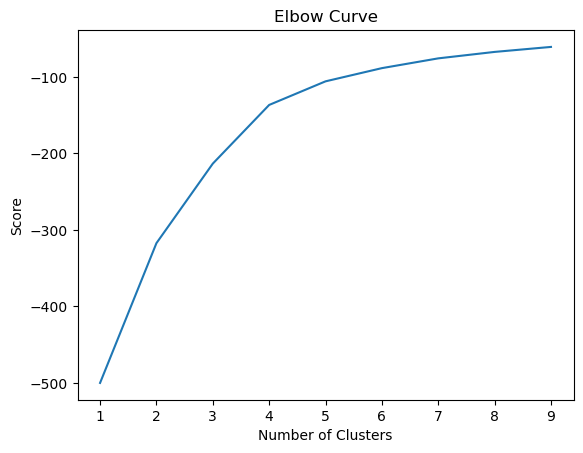

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I'm going to create 4 clusters based on the fact that the curve changes slope significantly after n=4.

### 5. K-Means Clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_Cluster_Scaler)

/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
# Creates a column 'clusters' in the original dataframe -- NOT the scaled one -- 
# with the cluster number for each observation. 

df_Cluster['clusters'] = kmeans.fit_predict(df_Cluster)

/Users/mistystone/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_70764/800269159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster['clusters'] = kmeans.fit_predict(df_Cluster)


In [25]:
#check head
df_Cluster.head()

,Economic Freedom Summary Index,GDP_PerCapita,Pop_mill,Enroll_Ratio_Secondary_Female,clusters
0,7.60,5181.0,2.84,76.5,0
1,4.82,3368.0,44.90,82.7,0
3,4.77,8476.0,45.51,96.8,0
6,7.69,48106.0,8.94,97.8,3
8,6.55,25194.0,0.41,88.1,2


In [26]:
#Check the counts of the clusters
df_Cluster['clusters'].value_counts()

0    82
2    23
3    17
1     3
Name: clusters, dtype: int64

### 6. Plots to explore the data in light of the clusters

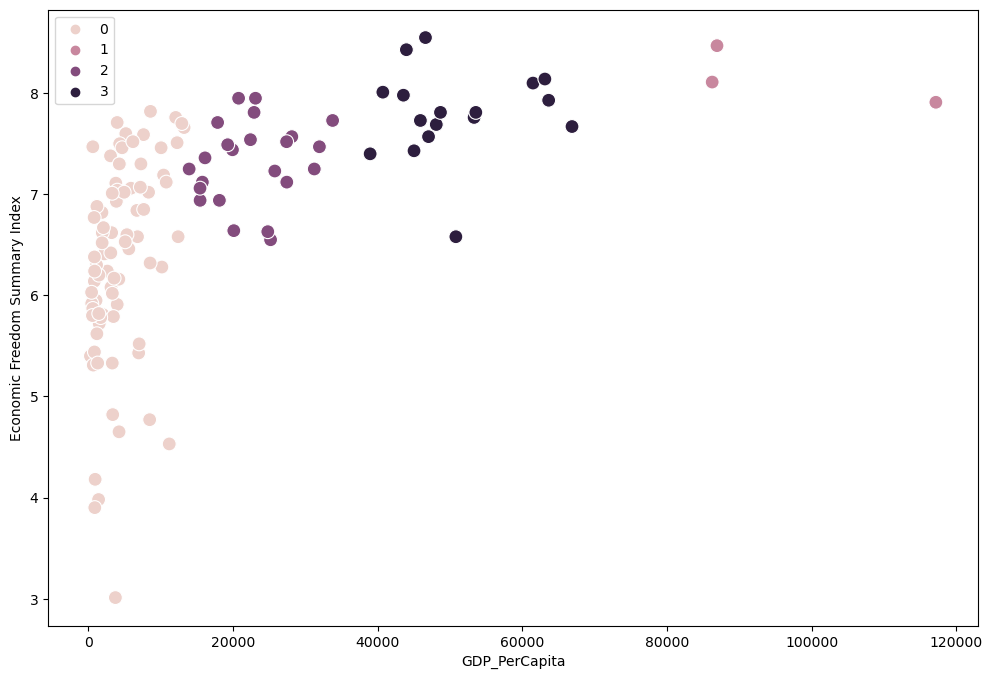

In [27]:
# Plot the clusters for the "Economic Freedom Summary Index" and "GDP_PerCapita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Cluster['GDP_PerCapita'], y=df_Cluster['Economic Freedom Summary Index'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP_PerCapita') # Label x-axis.
plt.ylabel('Economic Freedom Summary Index') # Label y-axis.
plt.show()

This plot shows that the algorithm clustered the countries by per capita GDP, in general. The light purple dots show the relatively "poor" nations, and they have a very large variance in their Economic Freedom Indexes. The two middle shades of purple show the next two "clusters" of nations, which the algorithm clustered based on their GDP, in general as well. The darker three dots are the highest per capita GDP nations.

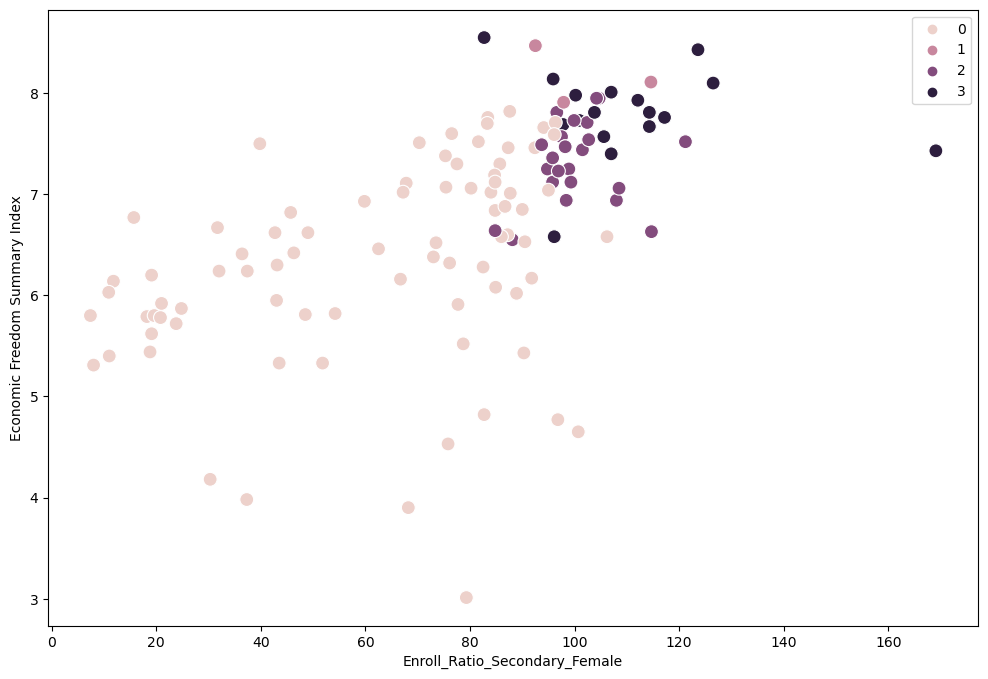

In [28]:
# Plot the clusters for the "Economic Freedom Summary Index" and "Enroll_Ration_Female" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Cluster['Enroll_Ratio_Secondary_Female'], y=df_Cluster['Economic Freedom Summary Index'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Enroll_Ratio_Secondary_Female') # Label x-axis.
plt.ylabel('Economic Freedom Summary Index') # Label y-axis.
plt.show()

This is such an interesting plot! We can really see the large variance in the relatively poor nations' female Secondary school enrollment. The nations in the "higher per capita GDP" clusters all have a relatively high level of female Secondary school enrollment. 

### 7. Descriptive Stats for each cluster

In [29]:
df_Cluster.loc[df_Cluster['clusters'] == 3, 'cluster'] = 'dark purple'
df_Cluster.loc[df_Cluster['clusters'] == 2, 'cluster'] = 'light purple'
df_Cluster.loc[df_Cluster['clusters'] == 1, 'cluster'] = 'mauve'
df_Cluster.loc[df_Cluster['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_70764/2748743723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster.loc[df_Cluster['clusters'] == 3, 'cluster'] = 'dark purple'


In [30]:
df_Cluster.groupby('cluster').agg({'Economic Freedom Summary Index':['mean', 'median','std'], 
                         'GDP_PerCapita':['mean', 'median','std'], 
                         'Pop_mill':['mean', 'median','std'],
                          'Enroll_Ratio_Secondary_Female':['mean', 'median','std']})

Economic Freedom Summary Index                  GDP_PerCapita  \
                                       mean median       std          mean   
cluster                                                                      
dark purple                        7.799412  7.810  0.442457  50671.823529   
light purple                       7.316087  7.360  0.402139  22474.695652   
mauve                              8.163333  8.110  0.283784  96784.000000   
pink                               6.334512  6.415  0.986762   4406.768293   

                                      Pop_mill                     \
               median           std       mean median         std   
cluster                                                             
dark purple   48106.0   8457.752126  40.152941   9.04   81.046975   
light purple  22413.0   5728.955763  12.167826   4.03   17.134611   
mauve         86919.0  17668.343414   4.803333   5.02    4.049350   
pink           3511.0   3535.917204  51.649878  17.52  161.496482   

             Enroll_Ratio_Secondary_Female                    
                                      mean median        std  
cluster                                                       
dark purple                     110.241176  107.0  18.679971  
light purple                    100.286957   98.9   7.875468  
mauve                           101.666667   97.9  11.521429  
pink                             62.395122   74.4  28.567546

Note that I reported standard deviation as well as mean and median.

The pink (poorest) nations had a mean Economic Freedom Index of 6.33, by far the smallest, but the standard deviation is by far the highest at 0.9868. The pink (poorest) nations also had by far the smallest GDP per capita, but the standard deviation was much lower, though not necessariy in proportion to the size of the GDP per capita. The pink (poorest) nations also had the smallest female secondary enrollment, but also the highest standard deviation. We can clearly conclude that among the relatively poorer nations of the world that there is much diversity in terms of Economic Freedom and female enrollment. 

The richest three nations had a mean of 8.1633. Note that these countries are Luxembourg, Switzerland, and Ireland. It is not surprising that the standard deviations of these data ponts is very small as there are only three of them -- we can see the wide variation in the scatterplots above. Note that these are relatively small countries by population

It is interesting to note that mauve countries are richer (by per capita GDP) than light purple, and they have much larger populations. I have not included a lot of considerations about population in my analysis of this data set so far. Perhaps in the final project?